In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.genfromtxt(r'E:\dataglacier\bank-additional\bank-additional-full.csv', delimiter=';',encoding='utf-8', dtype=None, names=True)
df1 = pd.DataFrame(data)

# removing the double quots ""

In [3]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].str.replace('"', '')

In [4]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# In this dataset  the NA values are replaced with "unknown"
therefore am going to replace unkonw with median rather than mean because:
1. Mean is sensitive to outliers. This introduces biased as outliers disproportionately influence the mean, potentially lead to distored analysis
2. Median is not sensitive to outliers. This is because the median is the middle value when the data is sorted.
# Generally, replacing NA values with the median is preferred since:
1. It is robust to skewed distribution
2. It preseves the original data distribution
 3. It provides a more accurate measure of the central tendancy in non-normal distribution.

In [5]:
# dealing with age i.e. convert age to numeric
obj= df1.select_dtypes(include=['object']).columns
obj

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [6]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df1['age'] = pd.to_numeric(df1['age'],errors='coerce')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  int64  
 1   job           41188 non-null  object 
 2   marital       41188 non-null  object 
 3   education     41188 non-null  object 
 4   default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   loan          41188 non-null  object 
 7   contact       41188 non-null  object 
 8   month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int32  
 11  campaign      41188 non-null  int32  
 12  pdays         41188 non-null  int32  
 13  previous      41188 non-null  int32  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [9]:
obj= df1.select_dtypes(include=['object']).columns
len(obj)
all_strings =[]
for i in obj:
    all_strings.append(df1[i].unique())

all_strings

[array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 array(['nonexistent', 'failure', 'success'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [10]:
single_list=[]
for u in all_strings:
    single_list.extend(u)
single_list

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'student',
 'married',
 'single',
 'divorced',
 'unknown',
 'basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'illiterate',
 'no',
 'unknown',
 'yes',
 'no',
 'yes',
 'unknown',
 'no',
 'yes',
 'unknown',
 'telephone',
 'cellular',
 'may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'mar',
 'apr',
 'sep',
 'mon',
 'tue',
 'wed',
 'thu',
 'fri',
 'nonexistent',
 'failure',
 'success',
 'no',
 'yes']

In [11]:
len(single_list)

55

In [12]:
obj_dict={}
for i , j in enumerate(single_list):
    obj_dict[j] = i+1

obj_dict

{'housemaid': 1,
 'services': 2,
 'admin.': 3,
 'blue-collar': 4,
 'technician': 5,
 'retired': 6,
 'management': 7,
 'unemployed': 8,
 'self-employed': 9,
 'unknown': 33,
 'entrepreneur': 11,
 'student': 12,
 'married': 13,
 'single': 14,
 'divorced': 15,
 'basic.4y': 17,
 'high.school': 18,
 'basic.6y': 19,
 'basic.9y': 20,
 'professional.course': 21,
 'university.degree': 23,
 'illiterate': 24,
 'no': 54,
 'yes': 55,
 'telephone': 34,
 'cellular': 35,
 'may': 36,
 'jun': 37,
 'jul': 38,
 'aug': 39,
 'oct': 40,
 'nov': 41,
 'dec': 42,
 'mar': 43,
 'apr': 44,
 'sep': 45,
 'mon': 46,
 'tue': 47,
 'wed': 48,
 'thu': 49,
 'fri': 50,
 'nonexistent': 51,
 'failure': 52,
 'success': 53}

In [13]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].map(obj_dict)



In [14]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,1,13,17,54,54,54,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
1,57,2,13,18,33,54,54,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
2,37,2,13,18,54,55,54,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
3,40,3,13,19,54,54,54,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
4,56,2,13,18,54,54,55,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,13,21,54,55,54,35,41,50,...,1,999,0,51,-1.1,94.767,-50.8,1.028,4963.6,55
41184,46,4,13,21,54,54,54,35,41,50,...,1,999,0,51,-1.1,94.767,-50.8,1.028,4963.6,54
41185,56,6,13,23,54,55,54,35,41,50,...,2,999,0,51,-1.1,94.767,-50.8,1.028,4963.6,54
41186,44,5,13,21,54,54,54,35,41,50,...,1,999,0,51,-1.1,94.767,-50.8,1.028,4963.6,55


# replace unknow with NaN

In [15]:
if 33 in df1['age']:
    print('33 is in df1')
else:
    print('33 is not in df1')

33 is in df1


In [16]:
# Excluding age since it is affected
df1.iloc[:, 1:7]=df1.iloc[:,1:7].replace(33, 'NaN' )

C:\Users\birge\AppData\Local\Temp\ipykernel_16456\3238944437.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        1
1        2
2        2
3        3
4        2
        ..
41183    6
41184    4
41185    6
41186    5
41187    6
Name: job, Length: 41188, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.iloc[:, 1:7]=df1.iloc[:,1:7].replace(33, 'NaN' )
C:\Users\birge\AppData\Local\Temp\ipykernel_16456\3238944437.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        13
1        13
2        13
3        13
4        13
         ..
41183    13
41184    13
41185    13
41186    13
41187    13
Name: marital, Length: 41188, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.iloc[:, 1:7]=df1.iloc[:,1:7].replace(33, 'NaN' )
C:\User

In [17]:
# viewing null data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  int64  
 1   job           41188 non-null  object 
 2   marital       41188 non-null  object 
 3   education     41188 non-null  object 
 4   default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   loan          41188 non-null  object 
 7   contact       41188 non-null  int64  
 8   month         41188 non-null  int64  
 9   day_of_week   41188 non-null  int64  
 10  duration      41188 non-null  int32  
 11  campaign      41188 non-null  int32  
 12  pdays         41188 non-null  int32  
 13  previous      41188 non-null  int32  
 14  poutcome      41188 non-null  int64  
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [18]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,1,13,17,54,54,54,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
1,57,2,13,18,NaN,54,54,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
2,37,2,13,18,54,55,54,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
3,40,3,13,19,54,54,54,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
4,56,2,13,18,54,54,55,34,36,46,...,1,999,0,51,1.1,93.994,-36.4,4.857,5191.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,13,21,54,55,54,35,41,50,...,1,999,0,51,-1.1,94.767,-50.8,1.028,4963.6,55
41184,46,4,13,21,54,54,54,35,41,50,...,1,999,0,51,-1.1,94.767,-50.8,1.028,4963.6,54
41185,56,6,13,23,54,55,54,35,41,50,...,2,999,0,51,-1.1,94.767,-50.8,1.028,4963.6,54
41186,44,5,13,21,54,54,54,35,41,50,...,1,999,0,51,-1.1,94.767,-50.8,1.028,4963.6,55


# Imputing median

In [19]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')

imputed_data = imputer.fit_transform(df1)

df = pd.DataFrame(imputed_data, columns=df1.columns)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  float64
 1   job           41188 non-null  float64
 2   marital       41188 non-null  float64
 3   education     41188 non-null  float64
 4   default       41188 non-null  float64
 5   housing       41188 non-null  float64
 6   loan          41188 non-null  float64
 7   contact       41188 non-null  float64
 8   month         41188 non-null  float64
 9   day_of_week   41188 non-null  float64
 10  duration      41188 non-null  float64
 11  campaign      41188 non-null  float64
 12  pdays         41188 non-null  float64
 13  previous      41188 non-null  float64
 14  poutcome      41188 non-null  float64
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [21]:
df2 = df.copy()

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  float64
 1   job           41188 non-null  float64
 2   marital       41188 non-null  float64
 3   education     41188 non-null  float64
 4   default       41188 non-null  float64
 5   housing       41188 non-null  float64
 6   loan          41188 non-null  float64
 7   contact       41188 non-null  float64
 8   month         41188 non-null  float64
 9   day_of_week   41188 non-null  float64
 10  duration      41188 non-null  float64
 11  campaign      41188 non-null  float64
 12  pdays         41188 non-null  float64
 13  previous      41188 non-null  float64
 14  poutcome      41188 non-null  float64
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

Text(0.5, 1.0, 'Corelation of the data')

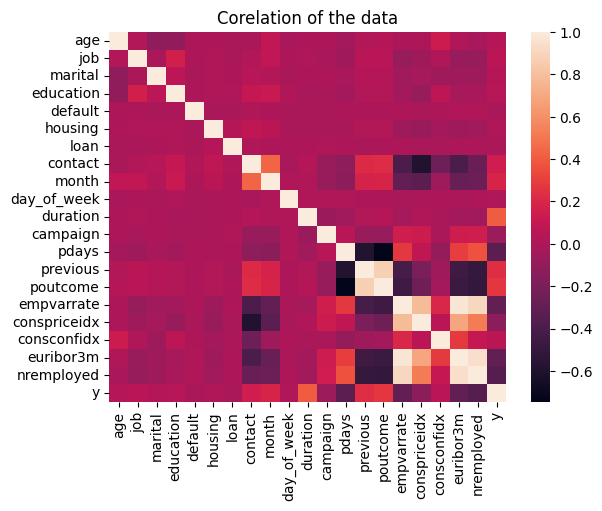

In [23]:
coree =df2.corr()
sns.heatmap(coree)
plt.title("Corelation of the data")

# We can observe that:
  1. pdays and euribor3m, nremployedc, empvarate and conspriceidx have less effect on subscription
  2. duration, month, poutcome,previous have great effect on the subscription

# Converting back to original after imputation of median 

In [24]:
inverse = {v:k for k,v in  obj_dict.items()}

In [25]:
obj

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [26]:
for i in range(len(obj)):
    df[obj[i]]=df[obj[i]].map(inverse)

In [27]:
for u in df.columns:
    if "unknown" in u:
        print('nothing happen')
    else:
        print("We made it🥲😁😁😎😎")

We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎
We made it🥲😁😁😎😎


In [28]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Viewing the transformed data that had 'unknown' 

Text(0.5, 1.0, 'Loan Status')

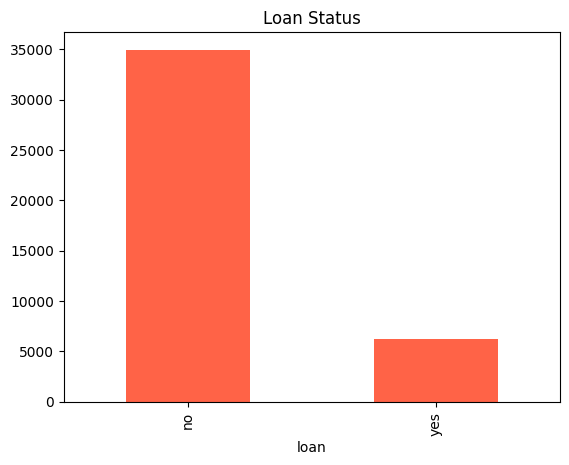

In [29]:
df['loan'].value_counts().plot(kind='bar',color='tomato')
plt.title('Loan Status')

<Axes: xlabel='housing'>

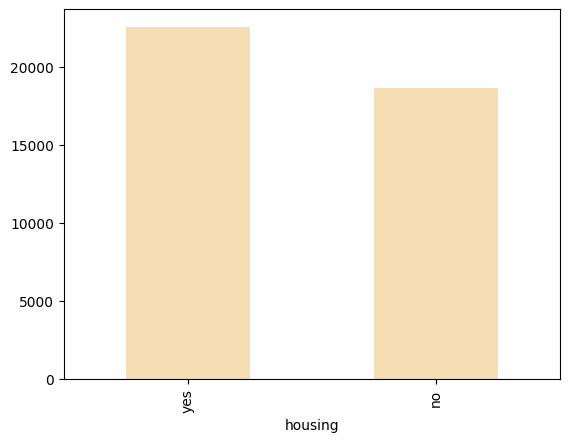

In [30]:
df['housing'].value_counts().plot(kind='bar',color='wheat')

Text(0.5, 1.0, 'Job Distribution')

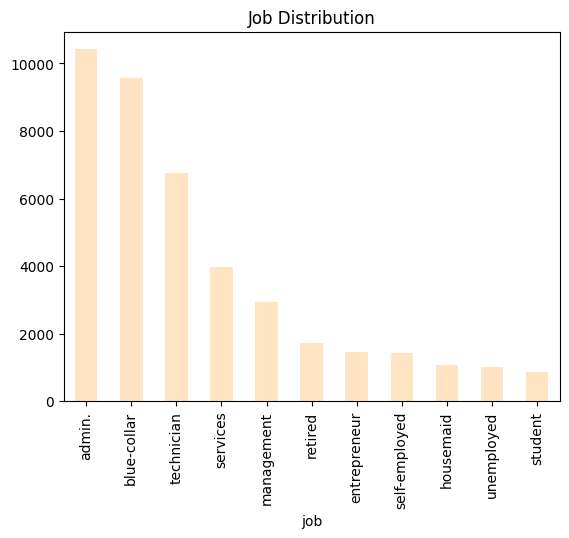

In [31]:
df['job'].value_counts().plot(kind='bar',color='bisque')
plt.title('Job Distribution')

Text(0.5, 1.0, 'Marital Status')

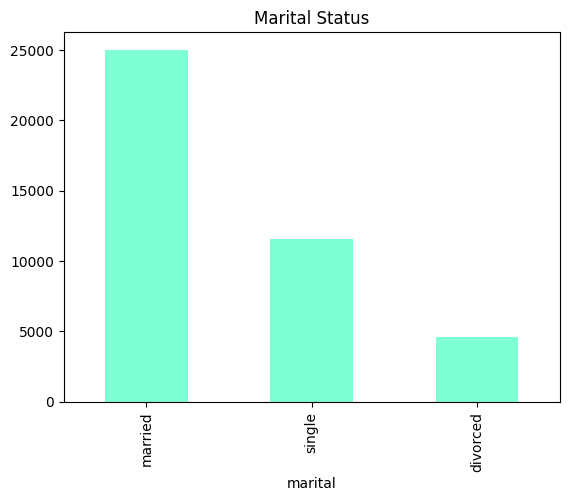

In [32]:
df['marital'].value_counts().plot(kind='bar',color='aquamarine')
plt.title('Marital Status')

Text(0.5, 1.0, 'Distribution of lvel of education')

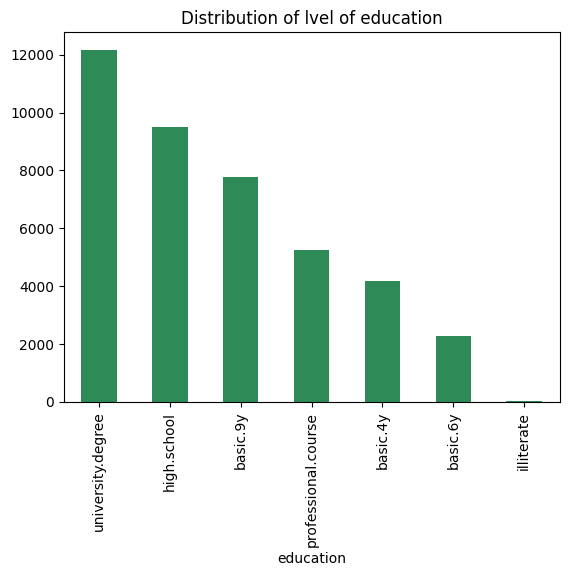

In [33]:
df['education'].value_counts().plot(kind='bar',color='seagreen')
plt.title('Distribution of lvel of education')

<Axes: xlabel='default'>

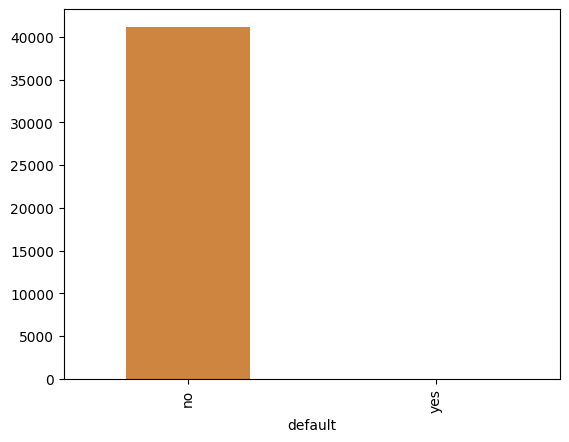

In [34]:
df['default'].value_counts().plot(kind='bar',color='peru')

Text(0.5, 1.0, 'Age distribution')

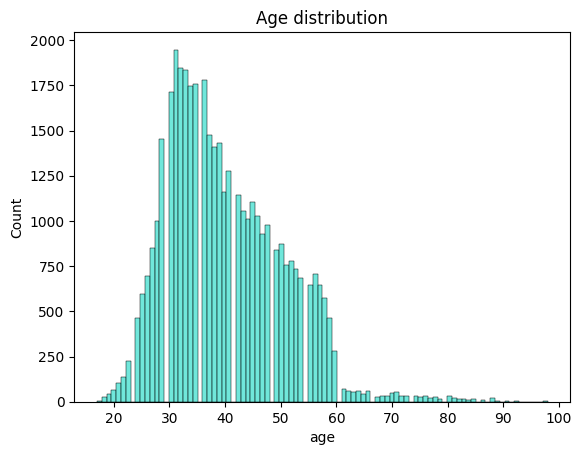

In [35]:
sns.histplot(df['age'],color='turquoise')
plt.title("Age distribution")

In [36]:
df['default'].value_counts()

default
no     41185
yes        3
Name: count, dtype: int64

# For further better data engineering the we must first randomize it. 

In [37]:
# randomize the data
df= df.sample(frac=1, ignore_index=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,26.0,blue-collar,single,basic.9y,no,yes,no,telephone,jun,thu,...,2.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
1,29.0,technician,married,university.degree,no,yes,no,cellular,nov,thu,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.592,5195.8,yes
2,34.0,technician,married,basic.9y,no,no,no,cellular,may,mon,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3,55.0,retired,married,basic.4y,no,yes,no,cellular,apr,mon,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.466,5099.1,yes
4,32.0,blue-collar,married,basic.6y,no,yes,no,telephone,jun,fri,...,6.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,34.0,admin.,single,university.degree,no,yes,no,cellular,aug,thu,...,6.0,3.0,1.0,success,-2.9,92.201,-31.4,0.851,5076.2,yes
41184,35.0,blue-collar,married,basic.9y,no,yes,no,cellular,jul,mon,...,1.0,6.0,2.0,success,-1.7,94.215,-40.3,0.889,4991.6,yes
41185,50.0,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,3.0,1.0,success,-0.1,93.200,-42.0,4.191,5195.8,no
41186,47.0,admin.,single,basic.9y,no,no,no,cellular,may,thu,...,2.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.327,5099.1,no


In [38]:
play= df.copy()

Text(0.5, 1.0, 'Job vs subscription')

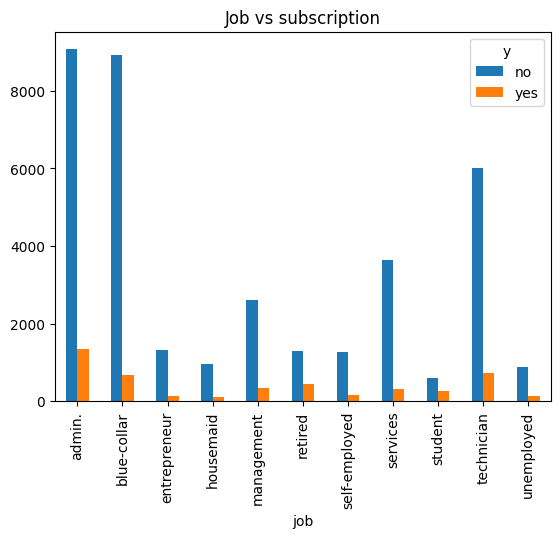

In [39]:
# job vs subscription
pd.crosstab(df['job'], df['y']).plot(kind='bar')
plt.title('Job vs subscription')

Text(0.5, 1.0, 'Age above 38 years vs subscription')

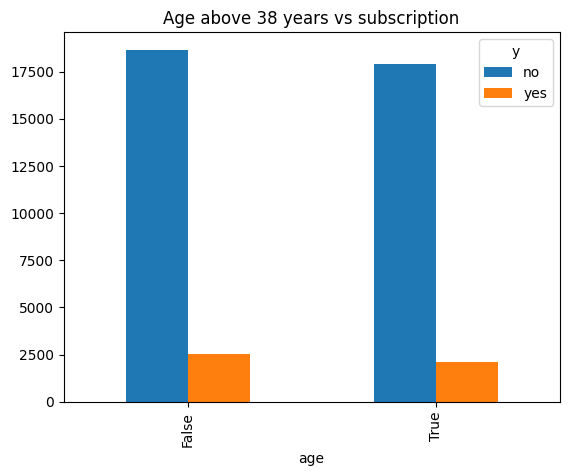

In [40]:
# age vs subscription
pd.crosstab(df['age']>38, df['y']).plot(kind='bar')
plt.title('Age above 38 years vs subscription')

In [41]:
df['age'].median()

38.0

Text(0.5, 1.0, 'Age below 38 years vs subscription')

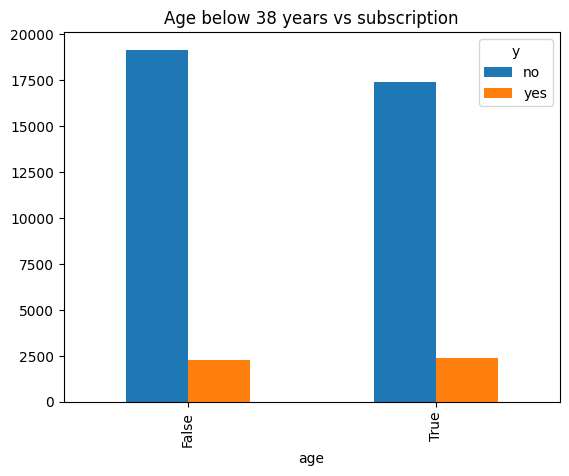

In [42]:
pd.crosstab(df['age']<38, df['y']).plot(kind='bar')
plt.title('Age below 38 years vs subscription')

Text(0.5, 1.0, 'Marital status vs subscrition')

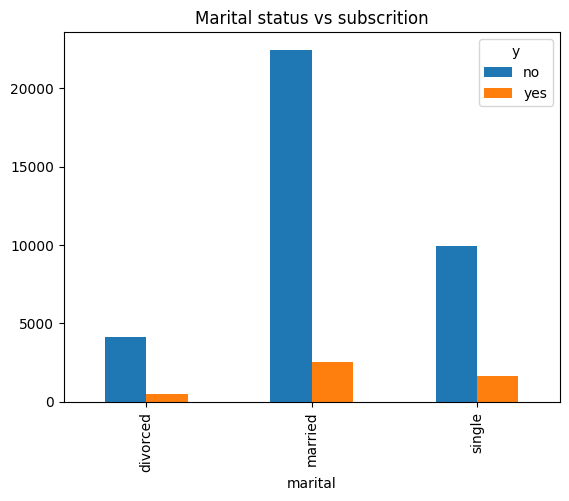

In [43]:
# marital  vs subscription
pd.crosstab(play['marital'],play['y']).plot(kind='bar', label= "attribute")
plt.title('Marital status vs subscrition')

Text(0.5, 1.0, 'level of education vs subscription')

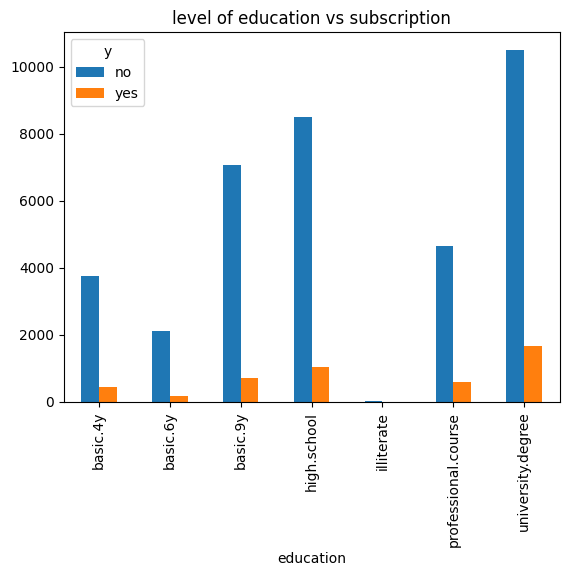

In [44]:
pd.crosstab(play['education'], play['y']).plot(kind='bar')
plt.title('level of education vs subscription')

Text(0.5, 1.0, 'Effect of loan')

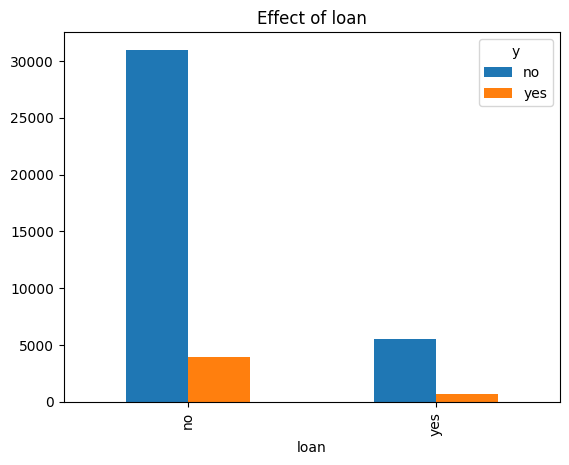

In [45]:
pd.crosstab(play['loan'], play['y']).plot(kind='bar')
plt.title('Effect of loan')

In [46]:
pd.crosstab(play['loan'], play['y'])


y,no,yes
loan,,
no,30983,3957
yes,5565,683


<Axes: xlabel='job'>

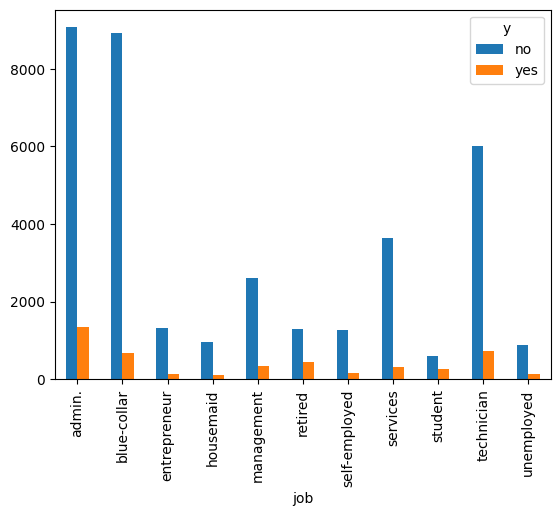

In [47]:
pd.crosstab(play['job'], play['y']).plot(kind='bar')

In [48]:
play['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

Text(0.5, 1.0, 'Most prefered means of communication')

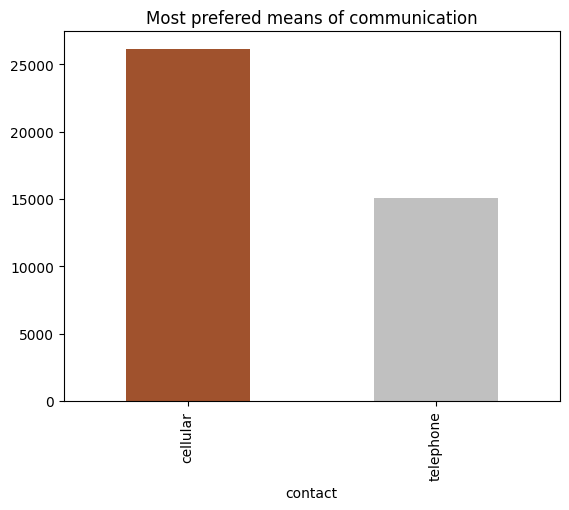

In [49]:
play['contact'].value_counts().plot(kind='bar',color=['sienna','silver'])
plt.title('Most prefered means of communication')


Text(0.5, 1.0, 'Means of communication vs subsription')

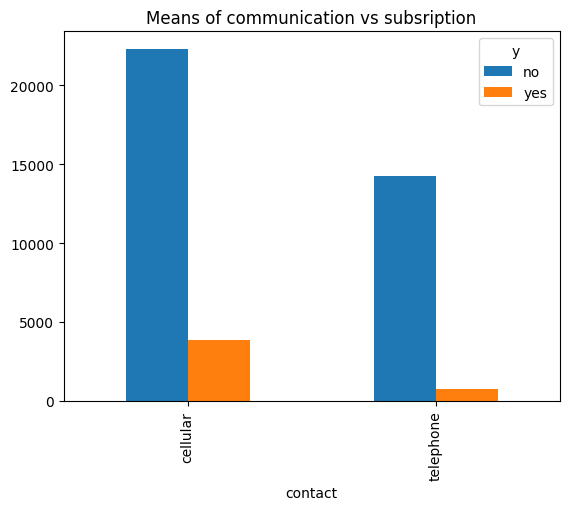

In [50]:
pd.crosstab(play['contact'], play['y']).plot(kind='bar')
plt.title('Means of communication vs subsription')

In [51]:
cc=pd.crosstab(play['education'], play['contact'])


In [52]:
pp= 'E:/dataglacier/bank-additional/pp.csv'
cc.to_csv(pp)

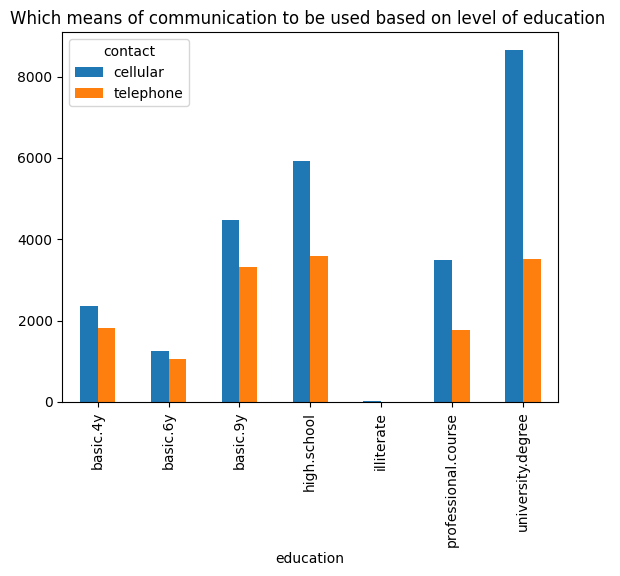

In [53]:
pd.crosstab(play['education'], play['contact']).plot(kind='bar',linestyle='-')
plt.title('Which means of communication to be used based on level of education ')
plt.show()

Text(0.5, 1.0, 'Previous results of the campaign vs subscription')

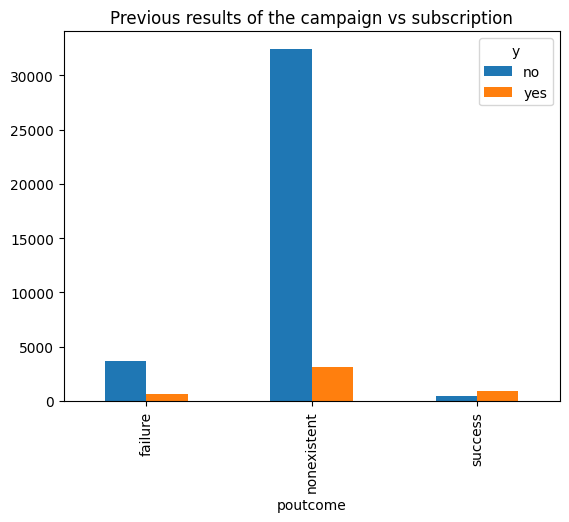

In [54]:
pd.crosstab(play['poutcome'], play['y']).plot(kind='bar')
plt.title('Previous results of the campaign vs subscription')

Text(0.5, 1.0, 'Number of contacts before this campaign vs subscription')

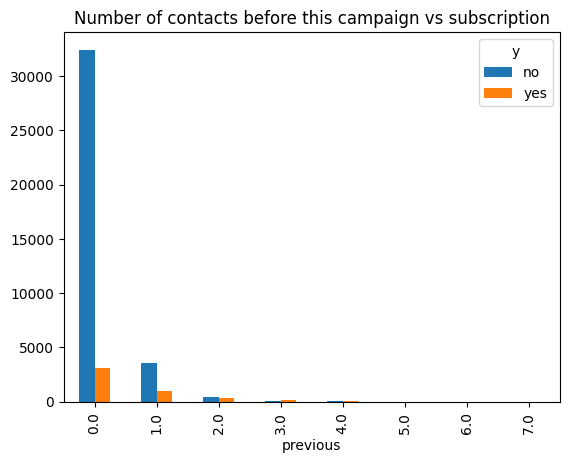

In [55]:
pd.crosstab(play['previous'], play['y']).plot(kind='bar')
plt.title('Number of contacts before this campaign vs subscription')

Text(0.5, 1.0, 'Attention')

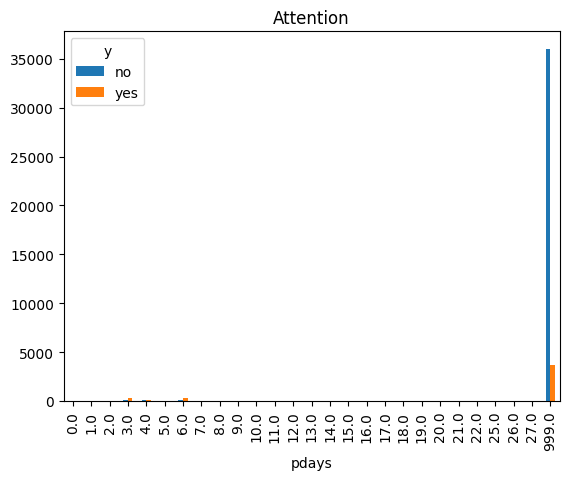

In [56]:
pd.crosstab(play['pdays'], play['y']).plot(kind='bar')
plt.title('Attention')

Text(0.5, 1.0, 'Cost of living')

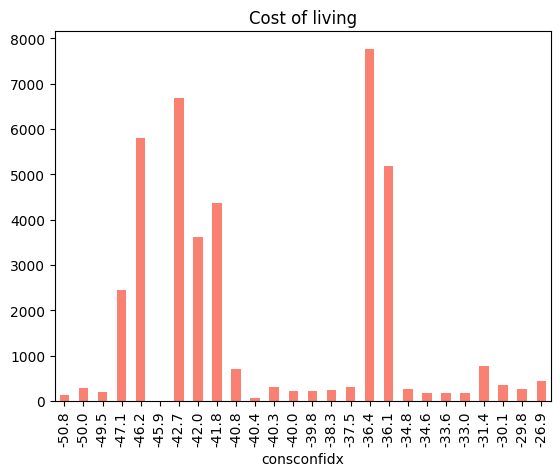

In [57]:
play['consconfidx'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Cost of living')

Text(0.5, 1.0, 'Employment variation rate')

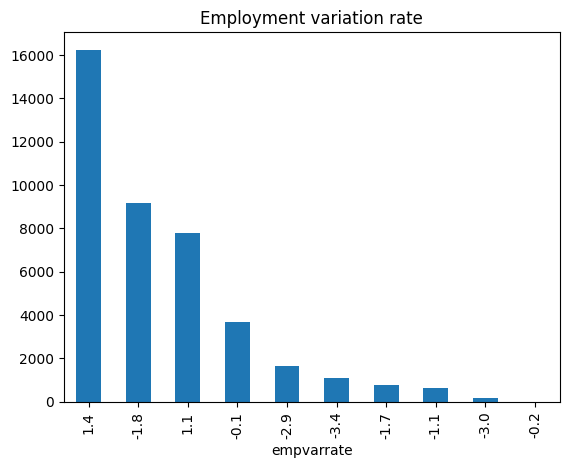

In [58]:
play['empvarrate'].value_counts().plot(kind='bar')
plt.title('Employment variation rate')

In [59]:
des= 'E:/dataglacier/bank-additional/play.csv'
play.to_csv(des)

In [60]:
play['conspriceidx'].value_counts()

conspriceidx
93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64

Text(0.5, 1.0, 'Consumer price index')

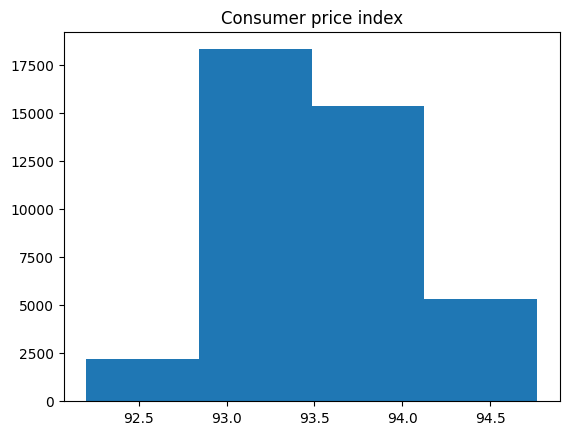

In [61]:
plt.hist(play['conspriceidx'], bins=4)
plt.title('Consumer price index')

Text(0.5, 1.0, 'Number of employees vs subscription')

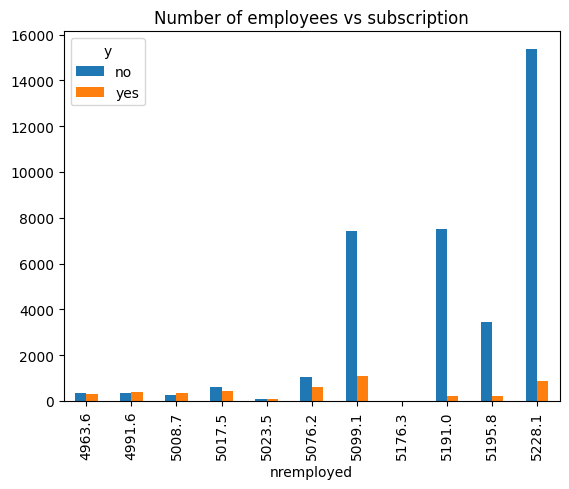

In [62]:
pd.crosstab(play['nremployed'], play['y']).plot(kind='bar')
plt.title("Number of employees vs subscription")

Text(0.5, 1.0, 'Euribor 3-month rate ')

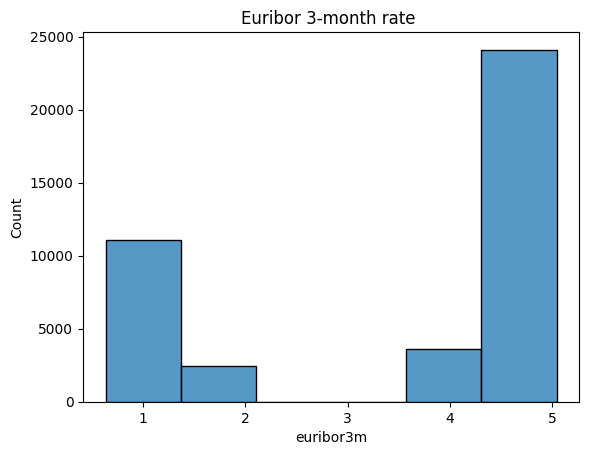

In [63]:
sns.histplot(play['euribor3m'],bins=6)
plt.title('Euribor 3-month rate ')

In [64]:
play['euribor3m'].value_counts()

euribor3m
4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.901       1
3.816       1
0.956       1
1.047       1
3.853       1
Name: count, Length: 316, dtype: int64

## WEEK12

Text(0.5, 1.0, 'Corelation of the data')

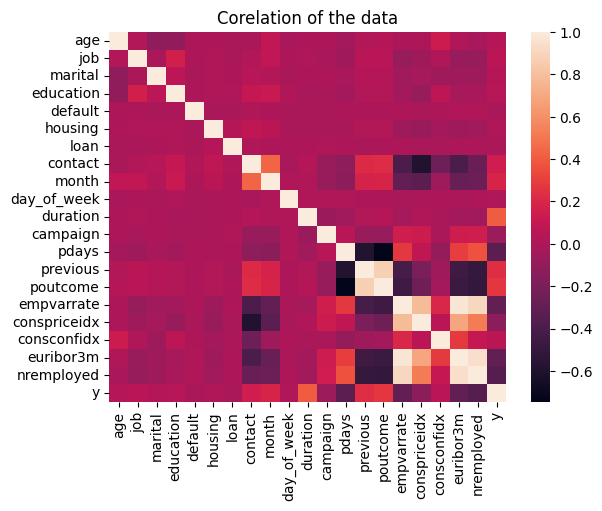

In [65]:
coree =df2.corr()
sns.heatmap(coree)
plt.title("Corelation of the data")

# We can observe that:
  1. pdays and euribor3m, nremployedc, empvarate and conspriceidx have less effect on subscription
  2. duration, month, poutcome,previous have great effect on the subscription

# Before building our model we are going to remove columns of nremployedc, empvarate and conspriceidx

In [66]:
# Randomize
df2= df2.sample(frac=1,ignore_index=True)
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,48.0,4.0,13.0,17.0,54.0,54.0,54.0,34.0,36.0,47.0,...,1.0,999.0,0.0,51.0,1.1,93.994,-36.4,4.857,5191.0,54.0
1,29.0,3.0,14.0,18.0,54.0,55.0,55.0,34.0,36.0,48.0,...,3.0,999.0,0.0,51.0,1.1,93.994,-36.4,4.859,5191.0,54.0
2,49.0,4.0,13.0,17.0,54.0,55.0,54.0,34.0,36.0,50.0,...,1.0,999.0,0.0,51.0,1.1,93.994,-36.4,4.859,5191.0,54.0
3,35.0,7.0,14.0,23.0,54.0,54.0,54.0,35.0,41.0,48.0,...,1.0,999.0,0.0,51.0,-0.1,93.200,-42.0,4.120,5195.8,54.0
4,58.0,11.0,13.0,17.0,54.0,54.0,55.0,35.0,41.0,47.0,...,2.0,999.0,1.0,52.0,-0.1,93.200,-42.0,4.153,5195.8,54.0


In [67]:
df3 = df2.drop(columns=['empvarrate','nremployed','conspriceidx'])
df3

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,consconfidx,euribor3m,y
0,48.0,4.0,13.0,17.0,54.0,54.0,54.0,34.0,36.0,47.0,128.0,1.0,999.0,0.0,51.0,-36.4,4.857,54.0
1,29.0,3.0,14.0,18.0,54.0,55.0,55.0,34.0,36.0,48.0,167.0,3.0,999.0,0.0,51.0,-36.4,4.859,54.0
2,49.0,4.0,13.0,17.0,54.0,55.0,54.0,34.0,36.0,50.0,147.0,1.0,999.0,0.0,51.0,-36.4,4.859,54.0
3,35.0,7.0,14.0,23.0,54.0,54.0,54.0,35.0,41.0,48.0,201.0,1.0,999.0,0.0,51.0,-42.0,4.120,54.0
4,58.0,11.0,13.0,17.0,54.0,54.0,55.0,35.0,41.0,47.0,164.0,2.0,999.0,1.0,52.0,-42.0,4.153,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,78.0,6.0,15.0,18.0,54.0,54.0,54.0,35.0,45.0,49.0,238.0,1.0,999.0,2.0,52.0,-37.5,0.884,54.0
41184,34.0,7.0,14.0,23.0,54.0,54.0,55.0,35.0,36.0,48.0,136.0,5.0,999.0,0.0,51.0,-46.2,1.281,54.0
41185,53.0,3.0,13.0,20.0,54.0,54.0,54.0,34.0,36.0,46.0,40.0,5.0,999.0,0.0,51.0,-46.2,1.354,54.0
41186,31.0,7.0,14.0,23.0,54.0,55.0,55.0,35.0,36.0,49.0,146.0,3.0,999.0,0.0,51.0,-46.2,1.266,54.0


# Split  data

In [68]:
x= df3.drop('y', axis=1)
y= df3['y']

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [70]:
len(x_train), len(y_train), len(x_test), len(y_test)

(32950, 32950, 8238, 8238)

In [71]:
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier
# make randomstate to be 42 for effective randomization of the data
histo= HistGradientBoostingClassifier(random_state=42)
ada=AdaBoostClassifier(random_state=42)
gdc=GradientBoostingClassifier(random_state=42)

In [72]:
def models(Xtrain,Ytrain,Xtest,Ytest):
    mode= [histo, ada,gdc]
    name=['HistGradientBoostingClassifier', 'AdaBoostClassifier','GradientBoostingClassifier']
    scores=[]
    for i in range(len(mode)):
        mode[i].fit(Xtrain,Ytrain)
        score= mode[i].score(Xtest,Ytest)
        scores.append(score)
    results ={}
    results = {key: value for key, value in zip(name,scores)}
    results_df = pd.DataFrame(list(results.items()), columns=['Key','Value'])
    return results_df

In [73]:
models(x_train, y_train, x_test, y_test)

c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Key,Value
0,HistGradientBoostingClassifier,0.920369
1,AdaBoostClassifier,0.912357
2,GradientBoostingClassifier,0.918305


# GradientBoostingClassifier performes best
Hence I will build my model around it

# Model evalution

In [74]:
from sklearn.metrics import f1_score,precision_score,auc, ConfusionMatrixDisplay,confusion_matrix,roc_curve,accuracy_score
y_pred = gdc.predict(x_test)

    

In [75]:
accuracy_score(y_test, y_pred)

0.9183054139354212

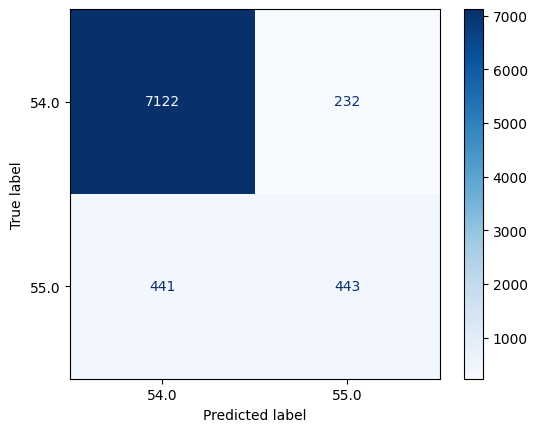

In [76]:
cm=confusion_matrix( y_test, y_pred)

disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gdc.classes_)
disp.plot(cmap=plt.cm.Blues)


In [77]:
f1_score(y_test,y_pred,pos_label= 54.0)


0.9548836897499497

In [92]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred,pos_label=55.0)

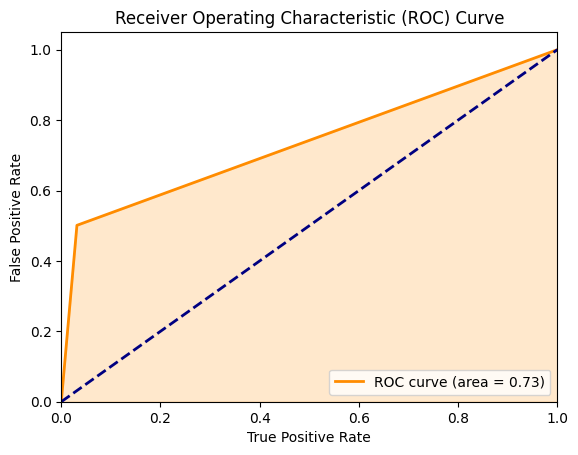

In [93]:
auc_value= auc(fpr,tpr)
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [82]:
model.fit(x_train,y_train)

LinearRegression()

In [83]:
model.score(x_test,y_test)

0.30140328921389203

In [85]:
y_p=model.predict(x_test)

In [89]:
fpr, tpr, thresholds= roc_curve(y_test, y_p,pos_label=55.0)

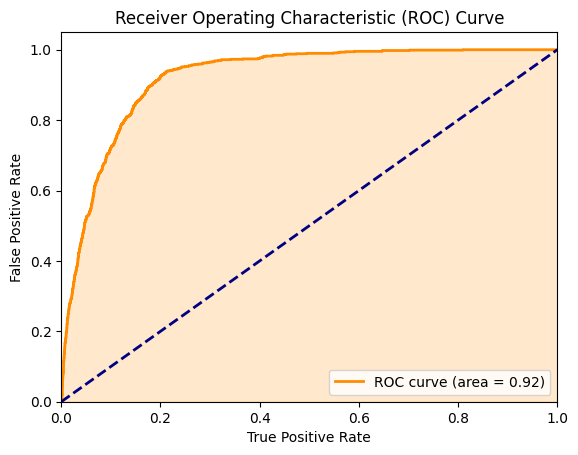

In [90]:
auc_value= auc(fpr,tpr)
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

linearRegression model performs better.


## THE END